In [1]:
5/2

2.5

https://stackoverflow.com/questions/39583264/pandas-strip-numbers-and-parenthesis-from-string

- using `replace` and `.str.extract()` with regex to modify string values

In [105]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

In [3]:
# check version of libraries
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

Pandas version: 0.22.0
Numpy version: 1.14.0


In [4]:
# confirming which version of Python I am using
import sys
print("Python Version:", sys.version)

Python Version: 3.6.2 (default, Nov 15 2017, 12:56:27) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.38)]


In [330]:
# set various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)
pd.set_option('display.precision', 3)

In [6]:
# check size of file; notice this is a bash command -- I can run it in the notebook!
!ls -l

total 112
-rw-r--r--@ 1 amelie  staff     75 Jan  3 22:14 README.md
-rw-r--r--  1 amelie  staff  45322 Jan  7 20:24 Untitled.ipynb
-rw-r--r--  1 amelie  staff   2992 Jan  3 22:14 faculty.csv
drwxr-xr-x  7 amelie  staff    224 Jan  7 19:42 pandas


# Faculty

In [7]:
faculty = pd.read_csv("faculty.csv")

In [8]:
faculty.head()

,name,degree,title,email
0,Scarlett L. Bellamy,Sc.D.,Associate Professor of Biostatistics,bellamys@mail.med.upenn.edu
1,Warren B. Bilker,Ph.D.,Professor of Biostatistics,warren@upenn.edu
2,Matthew W Bryan,PhD,Assistant Professor of Biostatistics,bryanma@upenn.edu
3,Jinbo Chen,Ph.D.,Associate Professor of Biostatistics,jinboche@upenn.edu
4,Susan S Ellenberg,Ph.D.,Professor of Biostatistics,sellenbe@upenn.edu


In [9]:
faculty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
name       37 non-null object
 degree    37 non-null object
 title     37 non-null object
 email     37 non-null object
dtypes: object(4)
memory usage: 1.2+ KB


In [331]:
faculty

,name,degree,title,email
0,Scarlett L. Bellamy,Sc.D.,Associate Professor of Biostatistics,bellamys@mail.med.upenn.edu
1,Warren B. Bilker,Ph.D.,Professor of Biostatistics,warren@upenn.edu
2,Matthew W Bryan,PhD,Assistant Professor of Biostatistics,bryanma@upenn.edu
3,Jinbo Chen,Ph.D.,Associate Professor of Biostatistics,jinboche@upenn.edu
4,Susan S Ellenberg,Ph.D.,Professor of Biostatistics,sellenbe@upenn.edu
5,Jonas H. Ellenberg,Ph.D.,Professor of Biostatistics,jellenbe@mail.med.upenn.edu
6,Rui Feng,Ph.D,Assistant Professor of Biostatistics,ruifeng@upenn.edu
7,Benjamin C. French,PhD,Associate Professor of Biostatistics,bcfrench@mail.med.upenn.edu
8,Phyllis A. Gimotty,Ph.D,Professor of Biostatistics,pgimotty@upenn.edu
9,Wensheng Guo,Ph.D,Professor of Biostatistics,wguo@mail.med.upenn.edu


# From Python Part 3 Pandas Example
### This notebook runs through an example using Pandas with the `jeopardy.csv` data.

**Data Source:**  200K+Jeopardy questions from [Reddit](https://www.reddit.com/r/datasets/comments/1uyd0t/200000_jeopardy_questions_in_a_json_file/)

---


In [11]:
ROOT_DIR = os.getcwd()
ROOT_DIR

'/Users/amelie/metis/metisgh/prework/dsp/python'

In [12]:
DATA_DIR = os.path.join(ROOT_DIR, 'pandas')
DATA_DIR

'/Users/amelie/metis/metisgh/prework/dsp/python/pandas'

In [13]:
infile1 = "jeopardy.csv"
infile2 = "olive.csv"

# Jeopardy

In [125]:
# https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python
jeopardy = df1 = pd.read_csv(os.path.join(DATA_DIR, infile1), encoding="latin1")
df1.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/04,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/04,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/04,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/04,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/04,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [126]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 7 columns):
Show Number    10999 non-null int64
Air Date       10999 non-null object
Round          10999 non-null object
Category       10999 non-null object
Value          10999 non-null object
Question       10999 non-null object
Answer         10999 non-null object
dtypes: int64(1), object(6)
memory usage: 601.6+ KB


In [127]:
df1.columns = df1.columns.map(lambda x: "_".join(x.lower().split()))
df1.columns

Index(['show_number', 'air_date', 'round', 'category', 'value', 'question',
       'answer'],
      dtype='object')

In [128]:
df1.show_number.nunique()

184

In [129]:
df1.describe()

,show_number
count,10999.000
mean,4308.181
std,1397.758
min,62.000
25%,3409.000
50%,4541.000
75%,5431.000
max,6294.000


In [130]:
df = df1.copy()

In [131]:
# round reserved word -> rename
df.rename({"round": "jround"}, axis=1, inplace=True)


In [132]:
df.jround.describe()

count         10999
unique            3
top       Jeopardy!
freq           5434
Name: jround, dtype: object

In [133]:
df.jround.unique()

array(['Jeopardy!', 'Double Jeopardy!', 'Final Jeopardy!'], dtype=object)

# groupby - simple count

In [134]:
df.groupby('jround').count()

,show_number,air_date,category,value,question,answer
jround,,,,,,
Double Jeopardy!,5382,5382,5382,5382,5382,5382
Final Jeopardy!,183,183,183,183,183,183
Jeopardy!,5434,5434,5434,5434,5434,5434


In [135]:
df.head()

,show_number,air_date,jround,category,value,question,answer
0,4680,12/31/04,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/04,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/04,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/04,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/04,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


## `df.column_name.replace` - alter values in column using regex

In [136]:
# assigning - copying over values
df["dollar_amt"] = df.value

# no assignmt b/c inplace=True
df['dollar_amt'].replace(regex=True,
                         inplace=True,
                         to_replace=r'\$',
                         value=r'')

- when using `.str.replace()` cannot use `inplace=True` but can if using `.replace()` directly

In [138]:
df['dollar_amt'] = df.dollar_amt.str.replace(',',"")
df.tail(2)

,show_number,air_date,jround,category,value,question,answer,dollar_amt
10997,4362,7/15/03,Double Jeopardy!,INVENTIVE MINDS,"$1,600",In 1952 he & Charles Bowman joined forces to d...,Orville Redenbacher,1600
10998,4362,7/15/03,Double Jeopardy!,REFRESHER COURSE,"$1,600","Lemon juice, sugar, gin, club soda & an egg go...",royal gin fizz,1600


# ---------------------------------------------

-  QUESTION TO SELF: What does `df.column_name.replace(",","")` without `.str` or `(regex=True...)` do???

In [139]:
df.value.replace(",", "").head(), df.value.replace(",", "").tail()

(0    $200
 1    $200
 2    $200
 3    $200
 4    $200
 Name: value, dtype: object, 10994    $1,200
 10995    $2,000
 10996    $1,600
 10997    $1,600
 10998    $1,600
 Name: value, dtype: object)

In [140]:
df.iloc[10995]

show_number                                     4362
air_date                                     7/15/03
jround                              Double Jeopardy!
category                                   PEN NAMES
value                                         $2,000
question       This pseudonym means "2 fathoms deep"
answer                                    Mark Twain
dollar_amt                                      2000
Name: 10995, dtype: object

# ---------------------------------------------

In [141]:
df.dtypes

show_number     int64
air_date       object
jround         object
category       object
value          object
question       object
answer         object
dollar_amt     object
dtype: object

In [142]:
df.head(2)

,show_number,air_date,jround,category,value,question,answer,dollar_amt
0,4680,12/31/04,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,200
1,4680,12/31/04,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,200


## change dtype 
- from object to numeric: 
`df['column_name'] = pd.to_numeric(df.colum_name, errors='coerce')`
- deal with `Nonetype` by passing `coerce` to argument `errors`

In [143]:
#df['show_number'] = 
pd.to_numeric(df.dollar_amt)#, errors="coerce")

ValueError: Unable to parse string "None" at position 55

In [144]:
df.dollar_amt.iloc[55]

'None'

In [145]:
df['dollar_amt'] = pd.to_numeric(df.dollar_amt, errors="coerce")

In [146]:
df.dollar_amt.describe()

count    10816.000
mean       761.001
std        643.154
min        100.000
25%        400.000
50%        600.000
75%       1000.000
max      12000.000
Name: dollar_amt, dtype: float64

# Barplot of categorical variable

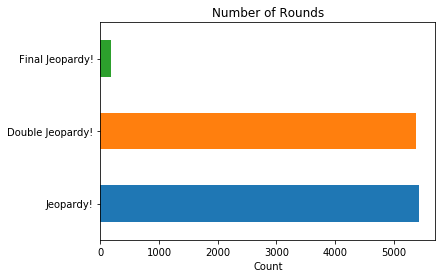

In [147]:
# f, ax = plt.subplots(figsize=(8,7))
df.jround.value_counts().plot(kind='barh', title="Number of Rounds")
plt.xlabel('Count')
plt.show()

# barplot of numeric variable

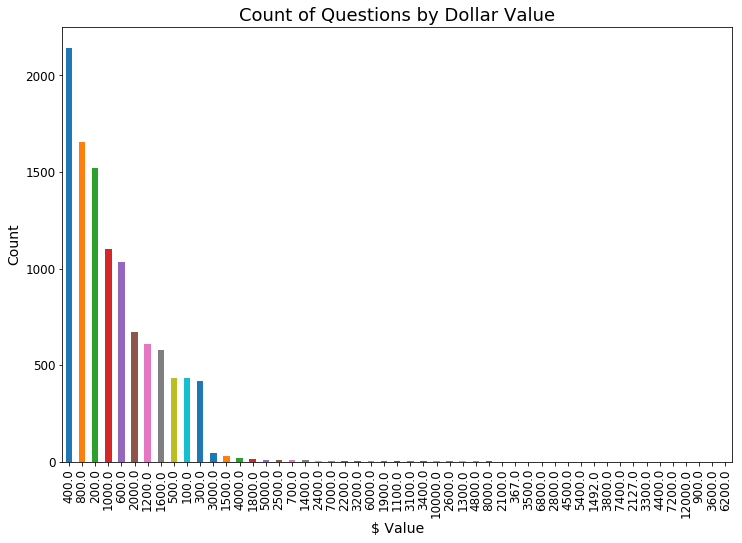

In [148]:
fig = plt.figure(figsize=(12,8))
df.dollar_amt.value_counts().plot('bar',                                   
                                 fontsize=12)#,
#                                  title="Count of questions by Dollar Value",)
plt.ylabel("Count", fontsize=14)
plt.xlabel("$ Value", fontsize=14)
plt.title("Count of Questions by Dollar Value", fontsize=18)
plt.show()

# barplot of categorical variable

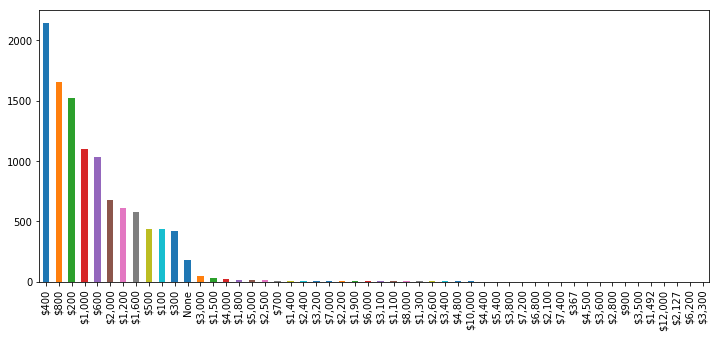

In [153]:
# fig, ax = plt.figure(figsize=(12,5))

fig = plt.figure(figsize=(12,5))
df.value.value_counts().plot('bar')

- below fails because it should be either

`fig = plt.figure(figsize=(12,5))`

OR

`f, ax = plt.subplots(figsize=(12,5))`


- if use plt.subplots, first argument determines shape of subplots; if single graph, can omit or write `1`; axes can be decoupled to begin with or done later but determines how you plot things onto it later on

In [150]:
# fig, ax = plt.figure(figsize=(12,5))

f, ax = plt.figure(1,figsize=(12,5),)
df.value.value_counts().plot('bar')

TypeError: 'Figure' object is not iterable

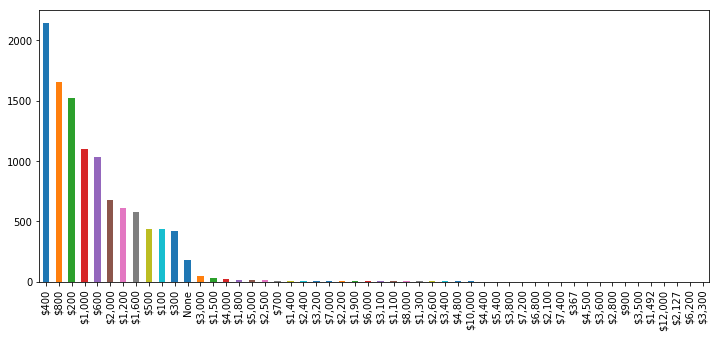

In [152]:
# fig, ax = plt.figure(figsize=(12,5))

f, ax = plt.subplots(1,figsize=(12,5))
df.value.value_counts().plot('bar')
plt.show()

# FUN JEOPARDY

In [158]:
df.category = df.category.str.title()    

In [159]:
df.head(10)

,show_number,air_date,jround,category,value,question,answer,dollar_amt
0,4680,12/31/04,Jeopardy!,History,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,200.0
1,4680,12/31/04,Jeopardy!,Espn'S Top 10 All-Time Athletes,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,200.0
2,4680,12/31/04,Jeopardy!,Everybody Talks About It...,$200,The city of Yuma in this state has a record av...,Arizona,200.0
3,4680,12/31/04,Jeopardy!,The Company Line,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,200.0
4,4680,12/31/04,Jeopardy!,Epitaphs & Tributes,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,200.0
5,4680,12/31/04,Jeopardy!,3-Letter Words,$200,"In the title of an Aesop fable, this insect sh...",the ant,200.0
6,4680,12/31/04,Jeopardy!,History,$400,Built in 312 B.C. to link Rome & the South of ...,the Appian Way,400.0
7,4680,12/31/04,Jeopardy!,Espn'S Top 10 All-Time Athletes,$400,"No. 8: 30 steals for the Birmingham Barons; 2,...",Michael Jordan,400.0
8,4680,12/31/04,Jeopardy!,Everybody Talks About It...,$400,"In the winter of 1971-72, a record 1,122 inche...",Washington,400.0
9,4680,12/31/04,Jeopardy!,The Company Line,$400,This housewares store was named for the packag...,Crate & Barrel,400.0


In [165]:
df['air_date'] = pd.to_datetime(df.air_date)

In [166]:
df.dtypes

show_number             int64
air_date       datetime64[ns]
jround                 object
category               object
value                  object
question               object
answer                 object
dollar_amt            float64
dtype: object

In [172]:
print("\n",df.air_date.min(),"\n", df.air_date.max())


 1984-12-04 00:00:00 
 2012-01-19 00:00:00


In [173]:
df.air_date.dt.year.value_counts()

1999    936
2007    777
2010    773
2006    729
2008    726
2009    671
2000    665
2004    654
2011    605
1998    591
2002    545
2005    541
       ... 
1996    244
2012    237
1992    122
1993    122
1988    114
1994     61
1991     61
1987     61
1995     57
1986     55
1984     55
1985     54
Name: air_date, Length: 28, dtype: int64

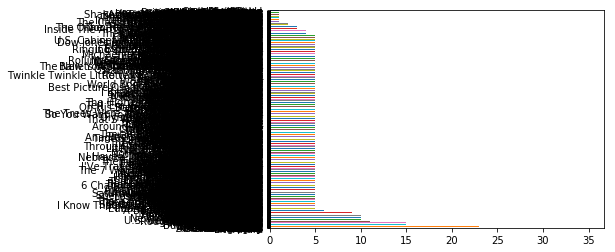

In [163]:
df.category.value_counts().plot(kind="barh")

In [162]:
list(df.category.unique())

['History',
 "Espn'S Top 10 All-Time Athletes",
 'Everybody Talks About It...',
 'The Company Line',
 'Epitaphs & Tributes',
 '3-Letter Words',
 'Dr. Seuss At The Multiplex',
 'Presidential States Of Birth',
 'Airline Travel',
 'That Old-Time Religion',
 'Musical Trains',
 '"X"S & "O"S',
 'The Solar System',
 'Geography "E"',
 'Radio Disney',
 'Parts Of Peach',
 'Be Fruitful & Multiply',
 "Let'S Bounce",
 'Rhymes With Smart',
 'Science Class',
 'Kids In Sports',
 'Just The Facts',
 'See & Say',
 'News To Me',
 'In The Dictionary',
 'Historic Women',
 'Royal Female Nicknames',
 'Tv Actors & Roles',
 'Travel & Tourism',
 '"I" Lads',
 'Forewords',
 'Backwords',
 'People In History',
 'Cinematic Dictionary',
 "It'S Ours!",
 'British Fashion',
 'Andy Warhol',
 'Theatre Crossword Clues "M"',
 'Sports Legends',
 'General Science',
 'Getting Possessive',
 'Flags Of The World',
 'Architects',
 '1994 Films',
 'The Eyes Have It',
 'Alaska',
 'International Sportsmen',
 'Drama Queens',
 'Angels',


In [176]:
df.air_date.dt.year.max()

2012

In [181]:
most_recent = df.air_date.dt.year.max()
df_all = df.copy()
df = df.loc[df.air_date.dt.year == most_recent]
df.head()

,show_number,air_date,jround,category,value,question,answer,dollar_amt
1915,6294,2012-01-19,Jeopardy!,"A Shakespeare Play, For Openers",$200,This play opens on the battlements of the cast...,Hamlet,200.0
1916,6294,2012-01-19,Jeopardy!,That'S Business,$200,He started a book business from his home in 18...,(Charles M.) Barnes,200.0
1917,6294,2012-01-19,Jeopardy!,Nursery Rhymes,$200,"Peter, Peter was an eater of this; he kept his...",pumpkin,200.0
1918,6294,2012-01-19,Jeopardy!,Inlets,$200,This largest Alaskan city lies at the head of ...,Anchorage,200.0
1919,6294,2012-01-19,Jeopardy!,"The Evolution Of ""M""Usic",$200,"This '60s ""Nights in White Satin"" band has ano...",Moody Blues,200.0


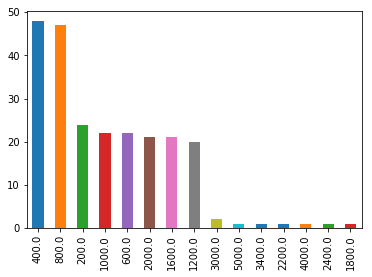

In [184]:
df.dollar_amt.value_counts().plot(kind="bar")

In [218]:
df200 = df.loc[df.dollar_amt == 200, (["category", "question", "answer"])]#.items():
df200 = df200.reset_index().drop(columns=["index"])
# df200.values

array([['A Shakespeare Play, For Openers',
        'This play opens on the battlements of the castle at Elsinore as Barnardo asks, "who\'s there?"',
        'Hamlet'],
       ["That'S Business",
        'He started a book business from his home in 1873; his son William joined forces with G. Clifford Noble in 1917',
        '(Charles M.) Barnes'],
       ['Nursery Rhymes',
        'Peter, Peter was an eater of this; he kept his wife in its shell',
        'pumpkin'],
       ['Inlets',
        'This largest Alaskan city lies at the head of cook inlet on the Kenai peninsula',
        'Anchorage'],
       ['The Evolution Of "M"Usic',
        'This \'60s "Nights in White Satin" band has another color in its name',
        'Moody Blues'],
       ['Foreign', 'In Portuguese, domingo is this day of the week',
        'Sunday'],
       ['Art & Artists',
        'In 1956 Time magazine dubbed this abstract expressionist "Jack the Dripper"',
        'Pollock'],
       ['Travel',
        'This Rome 

In [221]:
df_all.shape

(10999, 8)

In [225]:
for i, cat in enumerate(df200.category.unique()):
    print(i+1, ": ", cat)

1 :  A Shakespeare Play, For Openers
2 :  That'S Business
3 :  Nursery Rhymes
4 :  Inlets
5 :  The Evolution Of "M"Usic
6 :  Foreign
7 :  Art & Artists
8 :  Travel
9 :  Celebrities' Middle Names
10 :  Catholic Priests
11 :  Title 9
12 :  Come "In"
13 :  Slim Volumes
14 :  State Of The Union
15 :  Going Too "Fur"
16 :  It Might Surprise You
17 :  Jonathan Swifties
18 :  Comic Strips
19 :  Historic Dates
20 :  Sports Shorts
21 :  One Letter Different
22 :  The Land
23 :  Of Milk
24 :  & Honey


In [231]:
for cat, q, ans in df.loc[df.dollar_amt == 200, (["category","question", "answer"])].values:
    print("\n")
    print("Category: {}".format(cat))
    print("Q: {}".format(q))
    print("A: {}".format(ans))



Category: A Shakespeare Play, For Openers
Q: This play opens on the battlements of the castle at Elsinore as Barnardo asks, "who's there?"
A: Hamlet


Category: That'S Business
Q: He started a book business from his home in 1873; his son William joined forces with G. Clifford Noble in 1917
A: (Charles M.) Barnes


Category: Nursery Rhymes
Q: Peter, Peter was an eater of this; he kept his wife in its shell
A: pumpkin


Category: Inlets
Q: This largest Alaskan city lies at the head of cook inlet on the Kenai peninsula
A: Anchorage


Category: The Evolution Of "M"Usic
Q: This '60s "Nights in White Satin" band has another color in its name
A: Moody Blues


Category: Foreign
Q: In Portuguese, domingo is this day of the week
A: Sunday


Category: Art & Artists
Q: In 1956 Time magazine dubbed this abstract expressionist "Jack the Dripper"
A: Pollock


Category: Travel
Q: This Rome landmark is 620 feet long by 513 wide-- plenty of room to run away from a wild beast
A: the Colosseum


Categor

In [220]:
for cat, q, ans in df.loc[df.dollar_amt == 200, (["category","question", "answer"])].values:
    print("\n")
    print("Category: {}".format(cat))
    print("Q: {}".format(q))
    print("A: {}".format(ans))



Category: A Shakespeare Play, For Openers
Q: This play opens on the battlements of the castle at Elsinore as Barnardo asks, "who's there?"
A: Hamlet


Category: That'S Business
Q: He started a book business from his home in 1873; his son William joined forces with G. Clifford Noble in 1917
A: (Charles M.) Barnes


Category: Nursery Rhymes
Q: Peter, Peter was an eater of this; he kept his wife in its shell
A: pumpkin


Category: Inlets
Q: This largest Alaskan city lies at the head of cook inlet on the Kenai peninsula
A: Anchorage


Category: The Evolution Of "M"Usic
Q: This '60s "Nights in White Satin" band has another color in its name
A: Moody Blues


Category: Foreign
Q: In Portuguese, domingo is this day of the week
A: Sunday


Category: Art & Artists
Q: In 1956 Time magazine dubbed this abstract expressionist "Jack the Dripper"
A: Pollock


Category: Travel
Q: This Rome landmark is 620 feet long by 513 wide-- plenty of room to run away from a wild beast
A: the Colosseum


Categor

In [232]:
df200.category

0     A Shakespeare Play, For Openers
1                     That'S Business
2                      Nursery Rhymes
3                              Inlets
4            The Evolution Of "M"Usic
5                             Foreign
6                       Art & Artists
7                              Travel
8           Celebrities' Middle Names
9                    Catholic Priests
10                            Title 9
11                          Come "In"
12                       Slim Volumes
13                 State Of The Union
14                    Going Too "Fur"
15              It Might Surprise You
16                  Jonathan Swifties
17                       Comic Strips
18                     Historic Dates
19                      Sports Shorts
20               One Letter Different
21                           The Land
22                            Of Milk
23                            & Honey
Name: category, dtype: object

In [236]:
df.columns

Index(['show_number', 'air_date', 'jround', 'category', 'value', 'question',
       'answer', 'dollar_amt'],
      dtype='object')

In [238]:
for cat,amt, q, ans, in df.loc[df.category=='The Evolution Of "M"Usic', (["category","dollar_amt","question", "answer"])].values:
#     if cat == 
    print("\n")
    print("Category: {} for ${}:".format(cat, int(amt)))
    print("Q: {}".format(q))
    print("A: {}".format(ans))



Category: The Evolution Of "M"Usic for $200:
Q: This '60s "Nights in White Satin" band has another color in its name
A: Moody Blues


Category: The Evolution Of "M"Usic for $400:
Q: 1974's "Mandy" was his first Top 40 hit--& it reached No.1
A: Barry Manilow


Category: The Evolution Of "M"Usic for $600:
Q: This singer of "Jack & Diane" had to fight to record under his own name
A: John Mellencamp


Category: The Evolution Of "M"Usic for $800:
Q: In the '90s it was "Enter Sandman" with this group
A: Metallica


Category: The Evolution Of "M"Usic for $1000:
Q: In the 2000s "Makes Me Wonder" got this group noticed
A: Maroon 5


In [239]:
for cat,amt, q, ans, in df.loc[df.category=='Going Too "Fur"', (["category","dollar_amt","question", "answer"])].values:
#     if cat == 
    print("\n")
    print("Category: {} for ${}:".format(cat, int(amt)))
    print("Q: {}".format(q))
    print("A: {}".format(ans))



Category: Going Too "Fur" for $200:
Q: These electronic toys were a must-have item during the Christmas season of 1998
A: the Furby


Category: Going Too "Fur" for $400:
Q: Rolled up, like a flag or a boat's sails
A: furled


Category: Going Too "Fur" for $600:
Q: To provide & install housewares to a dwelling
A: furnish


Category: Going Too "Fur" for $800:
Q: A smelter, for example
A: a furnace


Category: Going Too "Fur" for $1000:
Q: Popular composition from around 1810 heard <a href="http://www.j-archive.com/media/2012-01-10_J_05.mp3">here</a>
A: FÕ_r Elise


In [240]:
for cat,amt, q, ans, in df.loc[df.category=='Come "In"', (["category","dollar_amt","question", "answer"])].values:
#     if cat == 
    print("\n")
    print("Category: {} for ${}:".format(cat, int(amt)))
    print("Q: {}".format(q))
    print("A: {}".format(ans))



Category: Come "In" for $200:
Q: A new design or creation; necessity is often the mother of it
A: invention


Category: Come "In" for $400:
Q: Be it a stick or cone, strawberry & sandalwood are popular fragrances of this
A: incense


Category: Come "In" for $600:
Q: A military badge of rank or qualification
A: insignia


Category: Come "In" for $800:
Q: Each Latin verb has 6 of these, including the perfect passive one, like optatus esse, "to have been desired"
A: infinitive


Category: Come "In" for $1000:
Q: Paul Apak Angilirq was a producer as Canada's IBC, this Broadcasting Corporation
A: Inuit


In [241]:
for cat,amt, q, ans, in df.loc[df.category=='Title 9', (["category","dollar_amt","question", "answer"])].values:
#     if cat == 
    print("\n")
    print("Category: {} for ${}:".format(cat, int(amt)))
    print("Q: {}".format(q))
    print("A: {}".format(ans))



Category: Title 9 for $200:
Q: Daniel Okrent: "Nine ___: The Anatomy of a Baseball Game"
A: Innings


Category: Title 9 for $400:
Q: John Buchan, filmed by Hitchcock: "The Thirty-Nine ___"
A: Steps


Category: Title 9 for $600:
Q: Elizabeth McNeill: "Nine and a Half ___"
A: Weeks


Category: Title 9 for $800:
Q: Jeffrey Toobin: "The Nine: Inside the Secret World of the ___ ___"
A: Supreme Court


Category: Title 9 for $1000:
Q: J.D. Salinger: "Nine ___"
A: Stories


In [242]:
for cat,amt, q, ans, in df.loc[df.category=='A Shakespeare Play, For Openers', (["category","dollar_amt","question", "answer"])].values:
#     if cat == 
    print("\n")
    print("Category: {} for ${}:".format(cat, int(amt)))
    print("Q: {}".format(q))
    print("A: {}".format(ans))



Category: A Shakespeare Play, For Openers for $200:
Q: This play opens on the battlements of the castle at Elsinore as Barnardo asks, "who's there?"
A: Hamlet


Category: A Shakespeare Play, For Openers for $400:
Q: "Othello" opens with Roderigo addressing this villain: "Tush, never tell me; I take it much unkindly"
A: Iago


Category: A Shakespeare Play, For Openers for $600:
Q: The chorus of "Romeo & Juliet" tells us it's in this city "where we lay our scene"
A: Verona


Category: A Shakespeare Play, For Openers for $800:
Q: Completes the opening sentence "Now is the winter of our discontent made glorious summer by this sun of..."
A: York


Category: A Shakespeare Play, For Openers for $1000:
Q: This play opens most dramatically with thunder & lightning. A ship is seen. Then a cry of "bos'n!"
A: The Tempest


##### proctor_and_gamble_logo 

- image: https://www.google.com/search?q=procter+and+gamble+logo&tbm=isch&source=iu&ictx=1&fir=PG9-vP9uXojiNM%253A%252CPiaop9T2LepunM%252C_&usg=__zqIb2anXGQHzn6j7SIVdRbtnt20%3D&sa=X&ved=0ahUKEwitgrq_zsfYAhUrw4MKHeb7C6cQ9QEINTAF#imgrc=PG9-vP9uXojiNM:

- story: http://www.corporate-eye.com/main/the-procter-gamble-logo-then-and-now/

In [243]:
for cat,amt, q, ans, in df.loc[df.category=="That'S Business", (["category","dollar_amt","question", "answer"])].values:
#     if cat == 
    print("\n")
    print("Category: {} for ${}:".format(cat, int(amt)))
    print("Q: {}".format(q))
    print("A: {}".format(ans))



Category: That'S Business for $200:
Q: He started a book business from his home in 1873; his son William joined forces with G. Clifford Noble in 1917
A: (Charles M.) Barnes


Category: That'S Business for $400:
Q: In 1997 Tyco International moved to this U.K. territory in the Atlantic for tax purposes
A: Bermuda


Category: That'S Business for $600:
Q: An Italian clothier is known as the United Colors of this
A: Benetton


Category: That'S Business for $800:
Q: In 1851 this company started using a logo with a man in the moon & 13 stars; now it uses its initials
A: Proctor & Gamble


Category: That'S Business for $1000:
Q: In 1927 this brand name first appeared on a Sears washing machine
A: Kenmore


In [244]:
for cat,amt, q, ans, in df.loc[df.category=='Nursery Rhymes', (["category","dollar_amt","question", "answer"])].values:
    print("\n")
    print("Category: {} for ${}:".format(cat, int(amt)))
    print("Q: {}".format(q))
    print("A: {}".format(ans))



Category: Nursery Rhymes for $200:
Q: Peter, Peter was an eater of this; he kept his wife in its shell
A: pumpkin


Category: Nursery Rhymes for $400:
Q: "I had a little hobby-horse and it was dapple gray; its head was made of pea-straw, its tail was made of" this
A: hay


Category: Nursery Rhymes for $600:
Q: In a counting nursery rhyme, they were "a-courting", "in the kitchen" & "a-waiting"
A: maids


Category: Nursery Rhymes for $800:
Q: While "January brings the snow", "may brings flocks of pretty" these, "skipping by their fleecy dams"
A: lambs


Category: Nursery Rhymes for $1000:
Q: "Here we go round" this bush "on a cold and frosty morning"
A: the mulberry bush


In [245]:
for cat,amt, q, ans, in df.loc[df.category=='Inlets', (["category","dollar_amt","question", "answer"])].values:
    print("\n")
    print("Category: {} for ${}:".format(cat, int(amt)))
    print("Q: {}".format(q))
    print("A: {}".format(ans))



Category: Inlets for $200:
Q: This largest Alaskan city lies at the head of cook inlet on the Kenai peninsula
A: Anchorage


Category: Inlets for $400:
Q: Big ships must pass through Admiralty Inlet to enter or leave this Washington State sound
A: Puget Sound


Category: Inlets for $1000:
Q: Faxa Bay in the North Atlantic is between this country's Snaefells & Reykjanes peninsulas
A: Iceland


Category: Inlets for $800:
Q: This Chilean city whose name means "valley of paradise" lies on a wide inlet of the Pacific
A: Valparaiso


Category: Inlets for $1000:
Q: North Carolina's Albemarle Sound is no deeper than 25 feet & is protected from the Atlantic by this island chain
A: the Outer Banks


In [246]:
for cat,amt, q, ans, in df.loc[df.category=='Foreign', (["category","dollar_amt","question", "answer"])].values:
    print("\n")
    print("Category: {} for ${}:".format(cat, int(amt)))
    print("Q: {}".format(q))
    print("A: {}".format(ans))



Category: Foreign for $200:
Q: In Portuguese, domingo is this day of the week
A: Sunday


Category: Foreign for $400:
Q: In French, l'oiseau is this; it sports les plumes
A: a bird


Category: Foreign for $600:
Q: If Popeye spoke Hebrew he'd ask for tered, this
A: spinach


Category: Foreign for $800:
Q: Tredici is Italian for this symbol of bad luck
A: thirteen


Category: Foreign for $1000:
Q: In German, berg is this topographical feature on a map
A: a mountain


In [255]:
for cat,amt, q, ans, in df.loc[df.category=='American History', (["category","dollar_amt","question", "answer"])].values:
#     print("\n")
    print("${}".format(int(amt)))#, cat, int(amt)))
#     print("${} : Category: {} for ${}:".format(int(amt), cat, int(amt)))
    print("     Q: {}".format(q))
    print("     A: {}".format(ans))

$400
     Q: In December 1974 this former New York governor was sworn in as Vice President
     A: Rockefeller
$800
     Q: In 1951 he told a joint session of congress that he "tried to do his duty as god gave him the light to see that duty"
     A: (Douglas) McArthur
$1800
     Q: This political party founded around 1789 stood for a strong central government
     A: the Federalists
$1600
     Q: His foes said that in 1877 he agreed to withdraw remaining federal troops from the south in return for electoral support
     A: (Rutherford B.) Hayes
$2000
     Q: In 1917 the U.S. purchased the islands of St. Croix, St. John & St. Thomas from this country for $25 million
     A: Denmark


### jeopardy

In [265]:
x = np.array([200,400,600,800,1000])
print(x)
going_to_fur = [1,1,1,0,1]
come_in = [1,1,1,0,0]
title_nine = [1,1,1,1,0]
##################
shakespeare_play = [1,1,1,1,1]
thats_business = [1,0,1,0,0]
###################
nursery_rhymes = [1,1,0,-1,1]
inlets = [1,1,1,0,0]
evolution_music = [1,1,1,1,0] #
foreign = [1,-1,1,0,1]



[ 200  400  600  800 1000]


In [282]:
np.asarray(going_to_fur)*x

array([ 200,  400,  600,    0, 1000])

In [319]:
total = np.asarray([0,0,0,0,0])
for scores in [going_to_fur, come_in, title_nine, shakespeare_play, 
            thats_business, nursery_rhymes, inlets, evolution_music, foreign]:
    total += np.asarray(scores)*x
print(total)    
print("jeopardy total including 3 categories from a different jeopardy round: ${:,g}".format(sum(total)))

[1800 2400 4800 1600 4000]
jeopardy total including 3 categories from a different jeopardy round: $14,600


In [321]:
total = np.asarray([0,0,0,0,0])
for scores in [shakespeare_play, 
            thats_business, nursery_rhymes, inlets, evolution_music, foreign]:
    total += np.asarray(scores)*x

In [322]:
print(total)
jeopardy_total = sum(total)
print("jeopardy total: ${:,g}".format(jeopardy_total))

[1200 1200 3000  800 3000]
jeopardy total: $9,200


### double jeopardy

In [323]:
x2 = x*2
print(x2)
american_history = [0,-1,1,-1,0]
whats_your_beef = [0,0,1,1,-1]
weopons_ww2 = [1,-1,1,-1,1]
living_planet = [1,0,1,1,1]  # 0 --> missing 600
acting_presidents = [-1,1,1,0,0]

four_n = [1, 1, 1, 0, 1 ]  #order flip

[ 400  800 1200 1600 2000]


In [324]:
total_double = np.asarray([0,0,0,0,0])
for scores in [american_history, whats_your_beef, weopons_ww2, living_planet, acting_presidents, four_n]:
    total_double += np.asarray(scores)*x2
print(total_double)    
double_jeopardy_total = sum(total_double)
print("double jeopardy total: {}".format(double_jeopardy_total))

[ 800    0 7200    0 4000]
double jeopardy total: 12000


In [325]:
round_total = jeopardy_total + double_jeopardy_total
print("jeopardy + double jeopardy total: {}".format(round_total))

jeopardy + double jeopardy total: 21200


### Final Jeopardy

In [326]:
sports_and_the_movies = {'total': round_total, 'wager': round_total, "score": 1, "dollars": round_total+round_total} #doubled earnings


In [327]:
print("Brian, your score for Jeopardy #6294 is ${:,g}".format(sports_and_the_movies['dollars']))

Brian, your score for Jeopardy #6294 is $42,400


# Jeopardy Show Number 6294
```python
array(['A Shakespeare Play, For Openers', "That'S Business",
       'Nursery Rhymes', 'Inlets', 'The Evolution Of "M"Usic', 'Foreign',
       'American History', "What'S Your Beef?", 'Weapons Of World War Ii',
       'The Living Planet', 'Acting Presidents On Tv', '4 N',
       'Sports & The Movies'])
```

In [277]:
df.loc[df.category=='Sports & The Movies']

,show_number,air_date,jround,category,value,question,answer,dollar_amt
1974,6294,2012-01-19,Final Jeopardy!,Sports & The Movies,None,"When asked for a home address in ""The Blues Br...",Wrigley Field,NaN


In [300]:
df.loc[(df.category=='A Shakespeare Play, For Openers') | (df.category=='4 N')]

,show_number,air_date,jround,category,value,question,answer,dollar_amt
1915,6294,2012-01-19,Jeopardy!,"A Shakespeare Play, For Openers",$200,This play opens on the battlements of the cast...,Hamlet,200.0
1921,6294,2012-01-19,Jeopardy!,"A Shakespeare Play, For Openers",$400,"""Othello"" opens with Roderigo addressing this ...",Iago,400.0
1927,6294,2012-01-19,Jeopardy!,"A Shakespeare Play, For Openers",$600,"The chorus of ""Romeo & Juliet"" tells us it's i...",Verona,600.0
1933,6294,2012-01-19,Jeopardy!,"A Shakespeare Play, For Openers",$800,"Completes the opening sentence ""Now is the win...",York,800.0
1939,6294,2012-01-19,Jeopardy!,"A Shakespeare Play, For Openers","$1,000",This play opens most dramatically with thunder...,The Tempest,1000.0
1950,6294,2012-01-19,Double Jeopardy!,4 N,$400,"Number of ""beers on the wall"" at the beginning...",ninety-nine,400.0
1955,6294,2012-01-19,Double Jeopardy!,4 N,$800,"""U"" know it means not deliberate; I'm sorry, t...",unintentional,800.0
1961,6294,2012-01-19,Double Jeopardy!,4 N,"$2,400",It's the church festival on March 25 commemora...,the annunciation,2400.0
1967,6294,2012-01-19,Double Jeopardy!,4 N,"$1,600",Adjective preceding the railroad completed in ...,transcontinental,1600.0
1973,6294,2012-01-19,Double Jeopardy!,4 N,"$2,000","Inopportune or untimely, like the title ""woman...",inconvenient,2000.0


# Jeopardy Show Number 6288

In [294]:
df.loc[df.category=='Art & Artists']

,show_number,air_date,jround,category,value,question,answer,dollar_amt
4495,6288,2012-01-11,Jeopardy!,Art & Artists,$200,In 1956 Time magazine dubbed this abstract exp...,Pollock,200.0
4501,6288,2012-01-11,Jeopardy!,Art & Artists,$400,This Dutch master served as chairman of the De...,Jan Vermeer,400.0
4507,6288,2012-01-11,Jeopardy!,Art & Artists,$600,"Aquarelle is a transparent, rather than opaque...",watercolor,600.0
4513,6288,2012-01-11,Jeopardy!,Art & Artists,$800,Andre Breton anagrammed this surrealist's name...,Salvador Dali,800.0
4519,6288,2012-01-11,Jeopardy!,Art & Artists,"$1,000",This American female impressionist modeled for...,(Mary) Cassatt,1000.0


In [185]:
df.category.unique()

array(['A Shakespeare Play, For Openers', "That'S Business",
       'Nursery Rhymes', 'Inlets', 'The Evolution Of "M"Usic', 'Foreign',
       'American History', "What'S Your Beef?", 'Weapons Of World War Ii',
       'The Living Planet', 'Acting Presidents On Tv', '4 N',
       'Sports & The Movies', 'Art & Artists', 'Travel',
       "Celebrities' Middle Names", 'Catholic Priests', 'Title 9',
       'Come "In"', 'Want Ads', 'Go "South"',
       'I Know That Word Backwards & Forwards', 'Mesopotamia',
       'The De Niro Code', 'At The Cleveland Clinic', 'Food Etymology',
       'Slim Volumes', 'State Of The Union', 'Going Too "Fur"',
       'It Might Surprise You', 'Jonathan Swifties', 'Comic Strips',
       'Architecture', 'Sounds Like A Capital City', 'Motorcycle Makers',
       'Missing Links', 'Plate Tectonics', 'Comics Strip',
       'Rulers In History', 'Historic Dates', 'Sports Shorts',
       'One Letter Different', 'The Land', 'Of Milk', '& Honey',
       'Any First Words?', 'S

In [293]:
for cat,amt, q, ans, in df.loc[df.category=='Art & Artists', 
                               (["category","dollar_amt","question", "answer"])].values:
    try:
        print("${}".format(int(amt)))
    except ValueError:
        print("Final Jeopardy: How much $ will you wager?")
    print("       Q: {}".format(q))
    print("       A: {}".format(ans))

$200
       Q: In 1956 Time magazine dubbed this abstract expressionist "Jack the Dripper"
       A: Pollock
$400
       Q: This Dutch master served as chairman of the Delft Artists' Guild from 1662-63 & 1670-71
       A: Jan Vermeer
$600
       Q: Aquarelle is a transparent, rather than opaque, type of this painting, as seen in Paul Klee's work "Quarry"
       A: watercolor
$800
       Q: Andre Breton anagrammed this surrealist's name as "Avida Dollars"
       A: Salvador Dali
$1000
       Q: This American female impressionist modeled for many of Degas' works, including "At the Milliner's"
       A: (Mary) Cassatt


In [264]:
df.jround.unique()
df.head()

,show_number,air_date,jround,category,value,question,answer,dollar_amt
1915,6294,2012-01-19,Jeopardy!,"A Shakespeare Play, For Openers",$200,This play opens on the battlements of the cast...,Hamlet,200.0
1916,6294,2012-01-19,Jeopardy!,That'S Business,$200,He started a book business from his home in 18...,(Charles M.) Barnes,200.0
1917,6294,2012-01-19,Jeopardy!,Nursery Rhymes,$200,"Peter, Peter was an eater of this; he kept his...",pumpkin,200.0
1918,6294,2012-01-19,Jeopardy!,Inlets,$200,This largest Alaskan city lies at the head of ...,Anchorage,200.0
1919,6294,2012-01-19,Jeopardy!,"The Evolution Of ""M""Usic",$200,"This '60s ""Nights in White Satin"" band has ano...",Moody Blues,200.0


Text(3.2,0.5,'category')

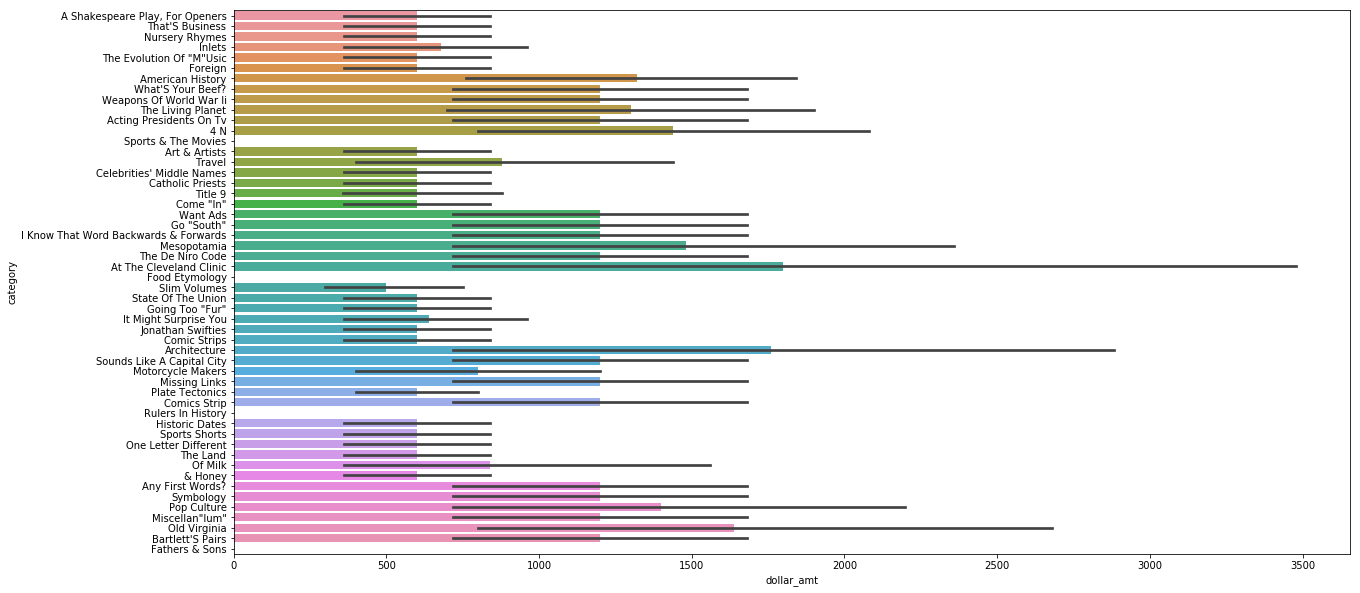

In [198]:
import seaborn as sns
fig = plt.figure(figsize=(20,10))
g = sns.barplot(x='dollar_amt', y='category', data=df)# size=12)
# ax.set_ylabel("category", fontsize=24)

In [328]:
df.show_number.unique()

array([6294, 6288, 6287, 6293])

# END JEOPARDY

# Python Part 3:  Pandas Exercises
---

# Olive

In [83]:
df = pd.read_csv(os.path.join(DATA_DIR,'olive.csv'))
df.rename({'Unnamed: 0': 'sub_region_desc'}, axis=1, inplace=True)
print(df.sub_region_desc[10:20])
print("\n")
df['sub_region_desc_raw'] = df.sub_region_desc

10    11.North-Apulia
11    12.North-Apulia
12    13.North-Apulia
13    14.North-Apulia
14    15.North-Apulia
15    16.North-Apulia
16    17.North-Apulia
17    18.North-Apulia
18    19.North-Apulia
19    20.North-Apulia
Name: sub_region_desc, dtype: object




### 3 ways to remove part of text --->  remove line numbers appended to region names:
- `apply` with string manipulation;
- `str.replace()` with regex;
- `.extract(pat,flags=0,expand=True)`  expand=False by default; True ensures returns DataFrame; flags same as `re` module (ie `re.I`, default `0` means no flags)


#### - (1) using `apply` to strip line numbers & get unique region names

In [84]:
# df['sub_region_desc_raw'] = df.sub_region_desc
df['sub_region_desc1'] = df.sub_region_desc.apply(lambda x: x.split(".")[-1])

print("There are {} unique values of 'sub_region_desc'\
once line numbers are stripped from the front of the region name".format(
    df.sub_region_desc1.nunique())
     )

There are 9 unique values of 'sub_region_desc'once line numbers are stripped from the front of the region name


#### - (2) using `replace` with regex to remove line numbers appended to region names
- replacing all digits and periods with empty space

In [85]:
df.sub_region_desc.str.replace(r'[\d\.]+', '').unique()

array(['North-Apulia', 'Calabria', 'South-Apulia', 'Sicily',
       'Inland-Sardinia', 'Coast-Sardinia', 'Umbria', 'East-Liguria',
       'West-Liguria'], dtype=object)

#### - (3) using `extract` with regex to remove line numbers appended to region names
- regex: capturing group
- `extract(pat, flags=0, expand=None)`
    where `pat`: `str`, regex pattern with capturing groups
    and `flags`: `int`, default `0` (no flags); `re` module flags - ie `re.IGNORECASE` / `re.I`
    and `expand`: `bool`, default `False`; if `True`, return DataFrame, else return `Series/Index/DataFrame` 

In [94]:
df['sub_region_desc2'] = df.sub_region_desc.str.extract(r'([A-Za-z\-]+)', expand=True) #[0]#.values[0]
print("Unique subregions: {}".format(
    df.sub_region_desc2.unique())
     )

Unique subregions: ['North-Apulia' 'Calabria' 'South-Apulia' 'Sicily' 'Inland-Sardinia'
 'Coast-Sardinia' 'Umbria' 'East-Liguria' 'West-Liguria']


In [86]:
help(df.sub_region_desc.str.extract)

Help on method extract in module pandas.core.strings:

extract(pat, flags=0, expand=None) method of pandas.core.strings.StringMethods instance
    For each subject string in the Series, extract groups from the
    first match of regular expression pat.
    
    Parameters
    ----------
    pat : string
        Regular expression pattern with capturing groups
    flags : int, default 0 (no flags)
        re module flags, e.g. re.IGNORECASE
    
    expand : bool, default False
        * If True, return DataFrame.
        * If False, return Series/Index/DataFrame.
    
        .. versionadded:: 0.18.0
    
    Returns
    -------
    DataFrame with one row for each subject string, and one column for
    each group. Any capture group names in regular expression pat will
    be used for column names; otherwise capture group numbers will be
    used. The dtype of each result column is always object, even when
    no match is found. If expand=False and pat has only one capture group,
    th

In [93]:
df.columns

Index(['sub_region_desc', 'region', 'area', 'palmitic', 'palmitoleic',
       'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic',
       'sub_region_desc_raw', 'sub_region_desc1', 'sub_region_desc2'],
      dtype='object')

In [95]:
df.head()

,sub_region_desc,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,sub_region_desc_raw,sub_region_desc1,sub_region_desc2
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29,1.North-Apulia,North-Apulia,North-Apulia
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29,2.North-Apulia,North-Apulia,North-Apulia
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29,3.North-Apulia,North-Apulia,North-Apulia
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35,4.North-Apulia,North-Apulia,North-Apulia
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46,5.North-Apulia,North-Apulia,North-Apulia


In [96]:
olive = df2 = pd.read_csv(os.path.join(DATA_DIR, infile2)).rename(
    {"Unnamed: 0":"sub_region_desc"}, axis=1) #, inplace=True)
olive.head()

,sub_region_desc,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [97]:
df = df2

In [102]:
# df['sub_region_desc2'] = 
df.sub_region_desc.str.extract(pat=r'([A-Za-z\-]+)', expand=True) #[0]#.values[0]

,0
0,North-Apulia
1,North-Apulia
2,North-Apulia
3,North-Apulia
4,North-Apulia
5,North-Apulia
6,North-Apulia
7,North-Apulia
8,North-Apulia
9,North-Apulia


In [100]:
df.head()

,sub_region_desc,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46


#### - BELOW: `AttributeError` --> the extract function is a **string** method that can be applied to the column; `df.col.str.extract()`

In [108]:
df['sub_region_desc'] = df.sub_region_desc.extract(pat=r'.*?([A-Za-z\-]+).*?',
                                                  flags=re.I,
                                                  expand=True)

AttributeError: 'Series' object has no attribute 'extract'

#### - BELOW: `ValueError` if you try to pass a compiled pattern as the regex pattern (ie as value of named argument `pat`)

In [110]:
pat= re.compile(r'.*?([A-Za-z\-]+).*?')

df.sub_region_desc.str.extract(pat=pat, flags=re.I, expand=True)

ValueError: cannot process flags argument with a compiled pattern

## String modification using `.str.extract`
- `df.column_name.str.extract(pat=r'', flags=0, expand=False)` 
- where pat is an uncompiled regular expression containing 1 or more capturing groups

In [112]:
df['sub_region_desc'] = df.sub_region_desc.str.extract(pat=r'.*?([A-Za-z\-]+).*?',
                                                  flags=re.I,
                                                  expand=True)

In [113]:
df.head()

,sub_region_desc,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,North-Apulia,1,1,1051,67,259,7771,672,50,80,46


# Start Olive

In [114]:
olive = df2 = pd.read_csv(os.path.join(DATA_DIR,'olive.csv'))
df = df2.copy()

df.rename({'Unnamed: 0': 'sub_region_desc'}, axis=1, inplace=True)

df['sub_region_desc'] = df.sub_region_desc.str.extract(pat=r'.*?([A-Za-z\-]+).*?',
                                                  flags=re.I,
                                                  expand=True)

In [115]:
df.head()

,sub_region_desc,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 11 columns):
sub_region_desc    572 non-null object
region             572 non-null int64
area               572 non-null int64
palmitic           572 non-null int64
palmitoleic        572 non-null int64
stearic            572 non-null int64
oleic              572 non-null int64
linoleic           572 non-null int64
linolenic          572 non-null int64
arachidic          572 non-null int64
eicosenoic         572 non-null int64
dtypes: int64(10), object(1)
memory usage: 49.2+ KB


## Q16:   Create a horizontal frequency barplot for 'region'

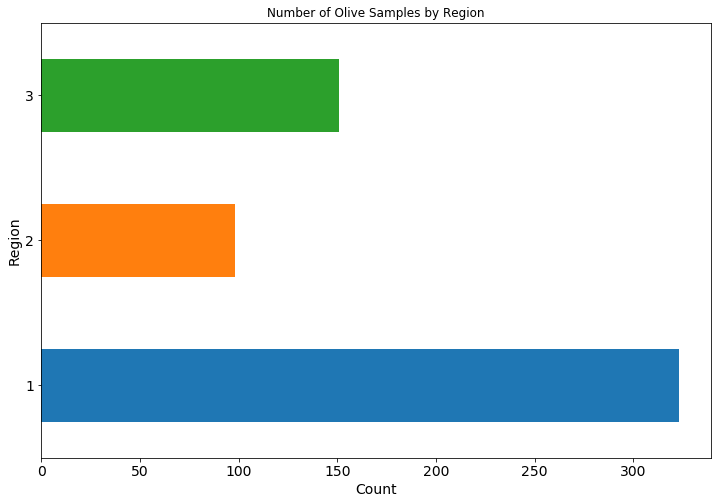

In [117]:
fig = plt.figure(figsize=(12,8))

df.groupby('region').count()['sub_region_desc'].plot(kind="barh",
                                                     fontsize=14,
                                                     title="Number of Olive Samples by Region")
                                                     
                                                                                                          
plt.ylabel("Region", fontsize=14)                                                     
plt.xlabel("Count", fontsize=14)
plt.show()


# ?? why can't I alter title size? plt.title does not work...

### - countplot fix ?
- q1: why is the Text from setting the title printed to the screen if pass x directly as `Text(0.5,1,'Number of olive oil samples by region')`; goes away if pass dataframe directly
- q2: why is the `orient` argument not working?! --> need to assign values to 'y' not 'x'

Text(0.5,1,'Number of olive oil samples by region')

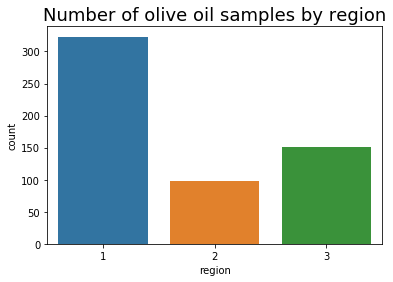

In [118]:
import seaborn as sns
f, ax = plt.subplots(1,figsize=(6,4))
g = sns.countplot(df.region, orient='h')        #.values makes no difference
ax.set_title("Number of olive oil samples by region", fontsize=18)
# ax.legend('')
# plt.plot()

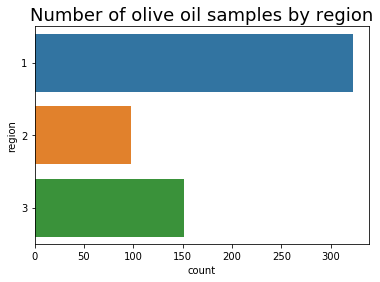

In [119]:
f, ax = plt.subplots(1,figsize=(6,4))
g = sns.countplot(y='region', data=df, orient="h")
# plt.title("Number of olive oil samples by region", fontsize=18)
ax.set_title("Number of olive oil samples by region", fontsize=18)
plt.show()

In [120]:
help(ax.set_title)

Help on method set_title in module matplotlib.axes._axes:

set_title(label, fontdict=None, loc='center', **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Set a title for the axes.
    
    Set one of the three available axes titles. The available titles
    are positioned above the axes in the center, flush with the left
    edge, and flush with the right edge.
    
    Parameters
    ----------
    label : str
        Text to use for the title
    
    fontdict : dict
        A dictionary controlling the appearance of the title text,
        the default `fontdict` is::
    
           {'fontsize': rcParams['axes.titlesize'],
            'fontweight' : rcParams['axes.titleweight'],
            'verticalalignment': 'baseline',
            'horizontalalignment': loc}
    
    loc : {'center', 'left', 'right'}, str, optional
        Which title to set, defaults to 'center'
    
    Returns
    -------
    text : :class:`~matplotlib.text.Text`
        The matplotlib t

## Q17:   Create a horizontal frequency barplot for 'sub_region'

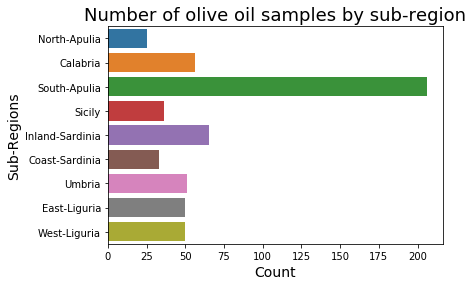

In [121]:
f, ax = plt.subplots(1,figsize=(6,4))
g = sns.countplot(y='sub_region_desc', data=df, orient="h")
# plt.title("Number of olive oil samples by region", fontsize=18)
plt.ylabel("Sub-Regions", fontsize=14)
plt.xlabel("Count", fontsize=14)
ax.set_title("Number of olive oil samples by sub-region", fontsize=18)
plt.show()

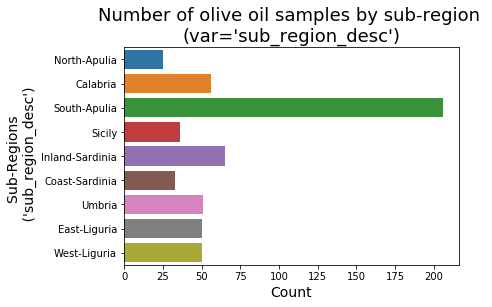

In [122]:
f, ax = plt.subplots(1,figsize=(6,4))
g = sns.countplot(y='sub_region_desc', data=df, orient="h")
# plt.title("Number of olive oil samples by region", fontsize=18)
plt.ylabel("Sub-Regions \n ('sub_region_desc')", fontsize=14)
plt.xlabel("Count", fontsize=14)
ax.set_title("Number of olive oil samples by sub-region \n(var='sub_region_desc')", fontsize=18)
plt.show()

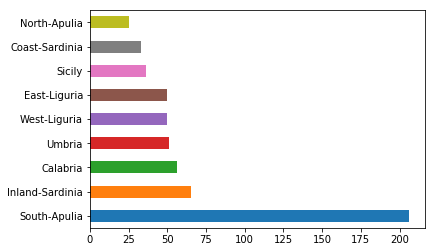

In [124]:
df.sub_region_desc.value_counts().plot('barh')